In [1]:
import networkx as nx

In [6]:
G = nx.DiGraph()

In [7]:
G.add_node('Alice')

In [10]:
list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [9]:
G.add_node('Bob')
G.add_node('Chuck')

In [11]:
G.nodes()

NodeView(('Alice', 'Bob', 'Chuck'))

In [12]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')

In [13]:
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

In [14]:
COLORS[0]

NameError: name 'COLORS' is not defined

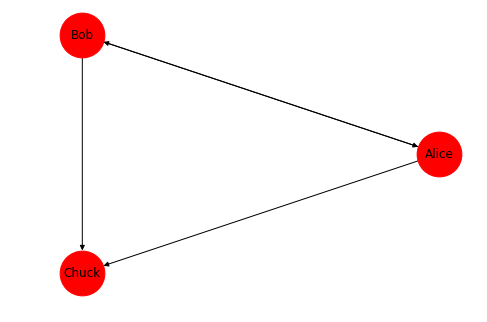

In [18]:
nx.draw_circular(G, node_color="#ff0000", node_size=2000, with_labels=True)

In [25]:
positions = dict(Albany=(-74,43),Boston=(-71,42),NYC=(-74, 41), Philly=(-75,40))

In [26]:
G2 = nx.Graph()




In [27]:
G2.add_nodes_from(positions)


In [28]:
drive_times = {('Albany', 'Boston'): 3, ('Albany', 'NYC'): 4, ('Boston', 'NYC'): 4,('NYC', 'Philly'): 2}

In [29]:
G2.add_edges_from(drive_times)

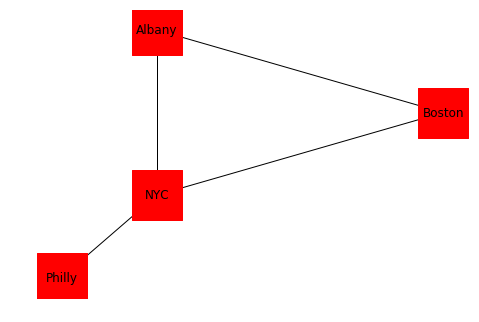

In [31]:
nx.draw(G2, positions, node_color='#ff0000', node_shape='s', node_size=2500, with_labels=True)

In [33]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if j > i:
                yield u, v
    

In [36]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G


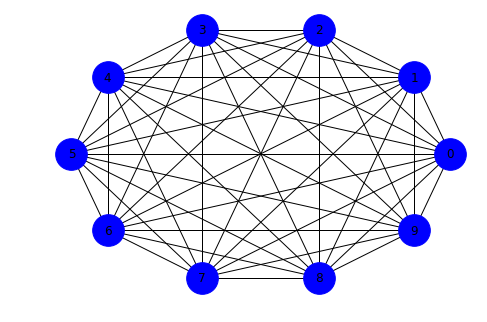

In [37]:
complete = make_complete_graph(10)
nx.draw_circular(complete, node_color='#0000ff', node_size=1000, with_labels=True)

In [39]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [46]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen
        

In [47]:
reachable_nodes(complete, 5)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [48]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

In [49]:
is_connected(G)

True

In [50]:
import numpy as np

In [51]:
def flip(p):
    return np.random.random() < p

In [52]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [53]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

In [54]:
random_graph = make_random_graph(10, 0.3)

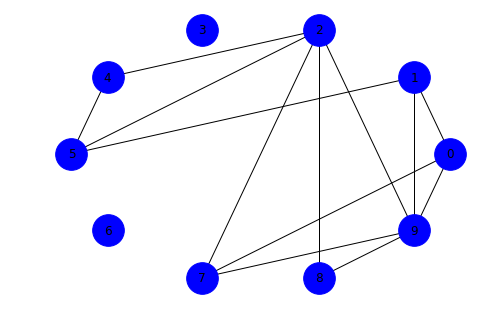

In [55]:
nx.draw_circular(random_graph, node_color='#0000ff', node_size=1000, with_labels=True)

In [60]:
def prob_connected(n, p, iters=1000):
    tf = [is_connected(make_random_graph(n,p)) for i in range(iters)]
    return np.mean(tf)


In [61]:
prob_connected(10, 0.23, iters=1000)

0.352

In [62]:
n = 10
ps = np.logspace(-2.5, 0, 11)
ys = [prob_connected(n,p) for p in ps]

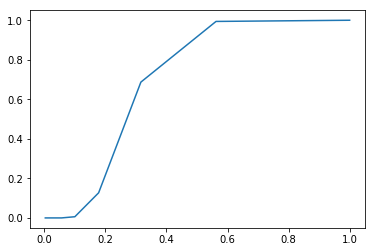

In [63]:
import matplotlib.pyplot as plt
plt.plot(ps, ys)